In [1]:
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
!ls ./data/Housing.csv

./data/Housing.csv


In [3]:
housing = pd.read_csv('./data/Housing.csv')

In [4]:
type(housing)

pandas.core.frame.DataFrame

In [5]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
housing.shape

(545, 13)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

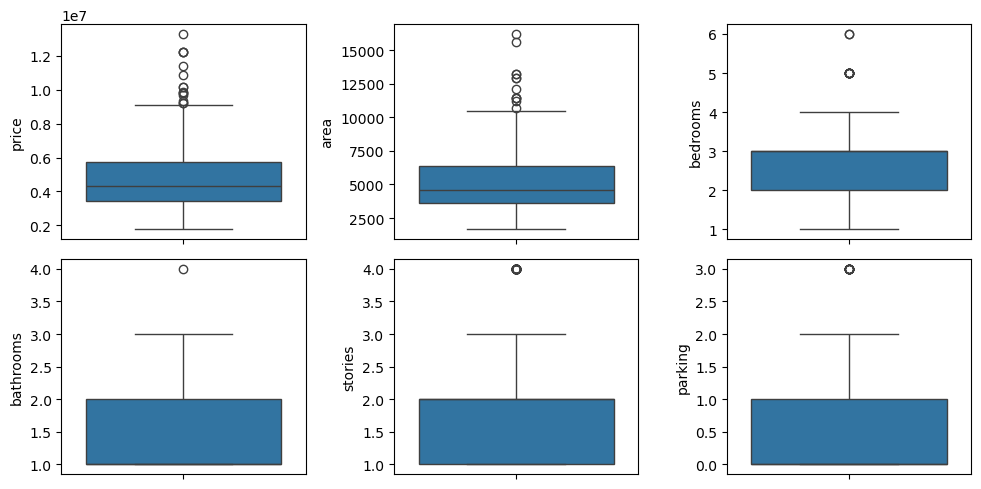

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

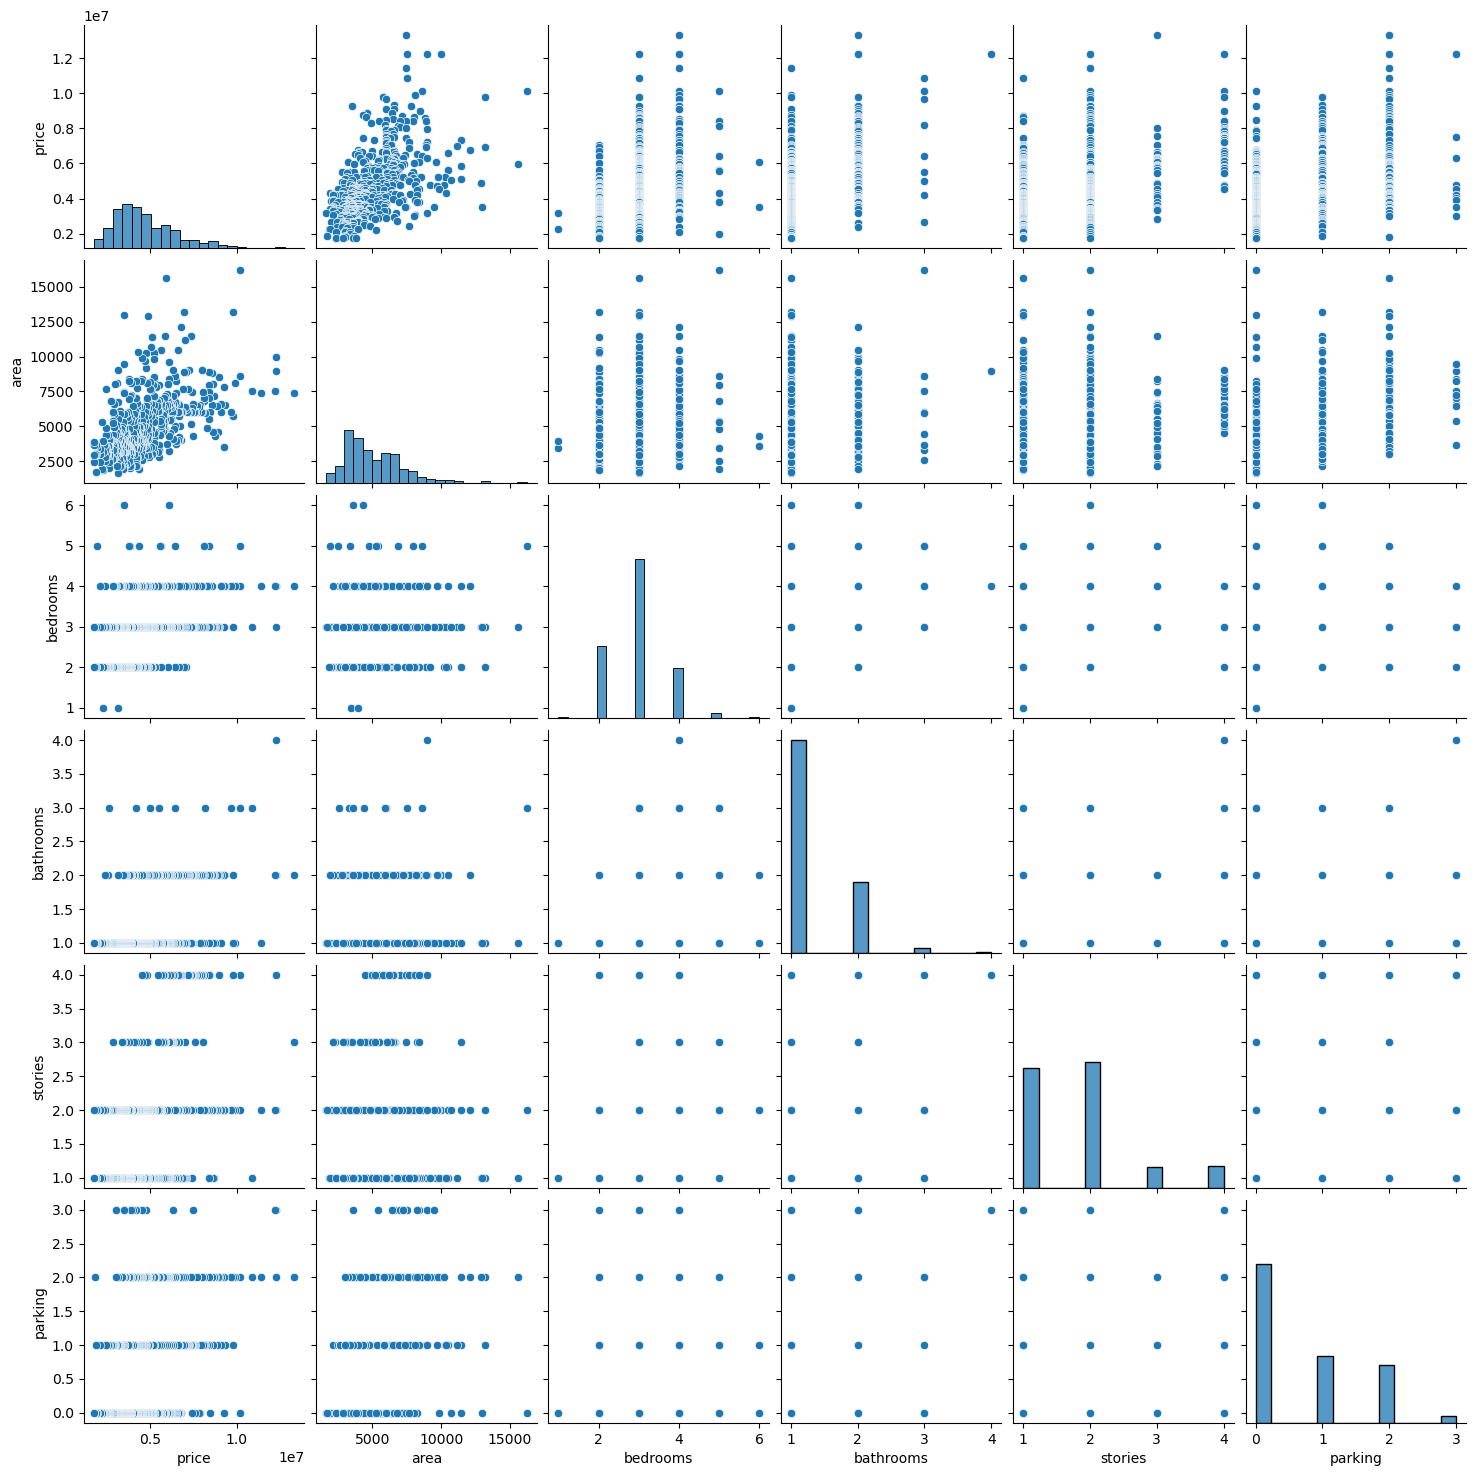

In [10]:
sns.pairplot(housing)
plt.show()

<Axes: xlabel='price', ylabel='prefarea'>

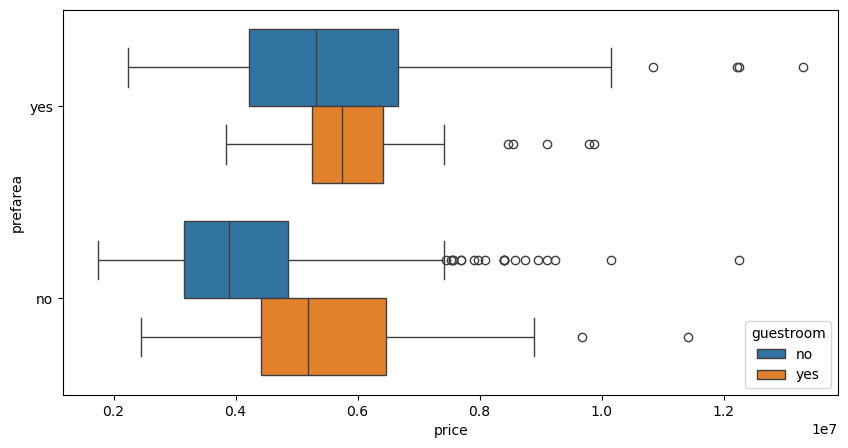

In [11]:
plt.figure(figsize = (10, 5))
sns.boxplot(x='price', y='prefarea', hue='guestroom', data=housing)

In [12]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
# housing[varlist] = housing[varlist].apply(binary_map)

housing[varlist] = housing[varlist].map(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


# Dummy variables

The variable furnishingstatus has three levels $\to$ convert these levels into integer as well.

In [13]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


Can represent 3 states using 2 bits

* 00: furnished
* 01: unfurnished
* 10: semi-furnished

$\to$ don't need the `furnished` col

In [14]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

housing = pd.concat([housing, status], axis = 1)

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [15]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 23) # random_state is a seed

df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
404,3493000,4900,3,1,2,0,0,0,0,0,0,0,False,True
314,4095000,4040,2,1,2,1,0,0,0,0,1,0,True,False
363,3710000,3584,2,1,1,1,0,0,1,0,0,0,True,False
271,4340000,1905,5,1,2,0,0,1,0,0,0,0,True,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


In [16]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,3.810000e+02,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,4.798104e+06,5130.435696,2.960630,1.317585,1.805774,0.842520,0.175853,0.354331,0.041995,0.314961,0.698163,0.251969
std,1.956359e+06,2156.548737,0.737009,0.534524,0.873028,0.364732,0.381196,0.478939,0.200841,0.465111,0.861896,0.434714
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4510.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.866000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


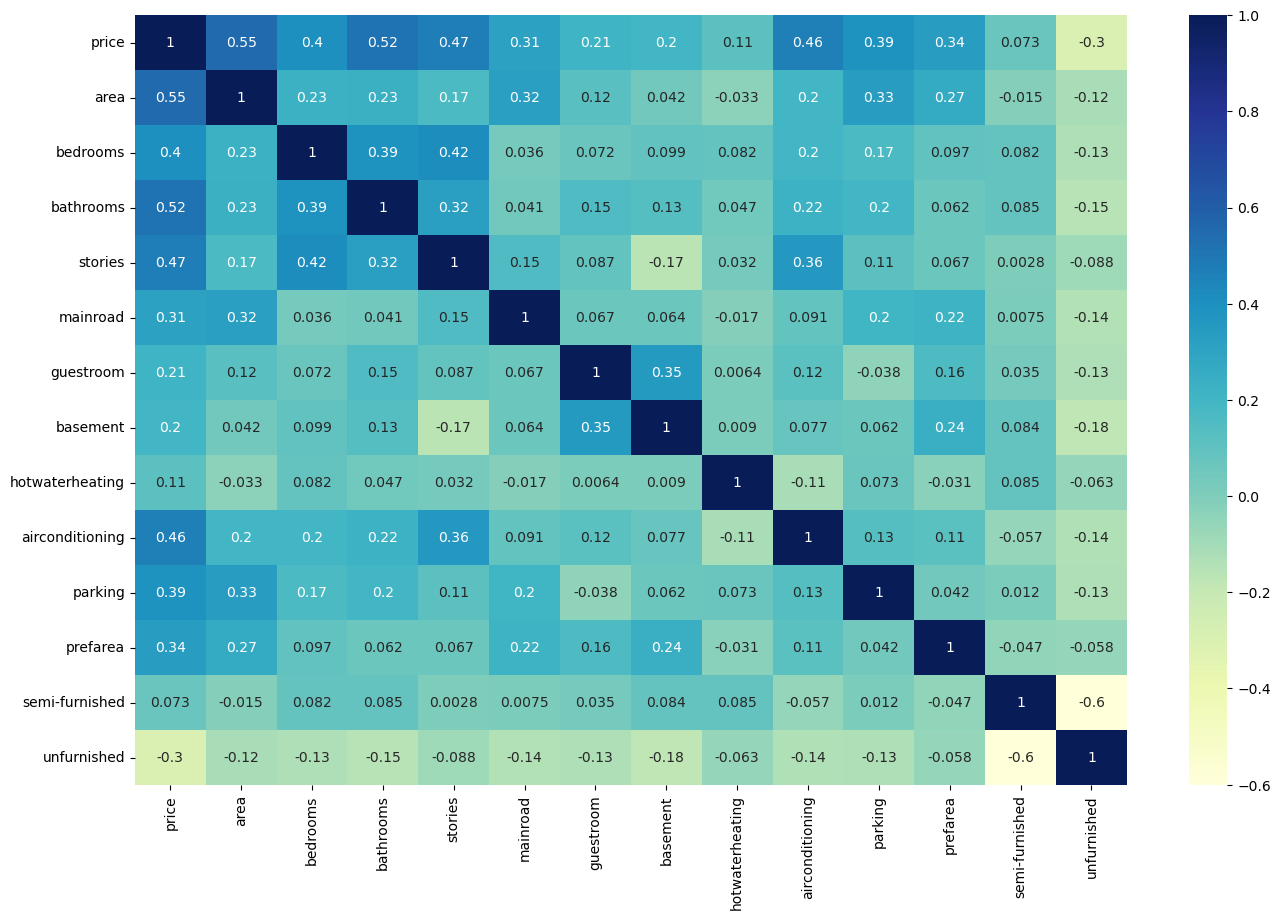

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Model

* **weights:** the influence of each feature on our prediction.
* **bias:** the value of the estimate when all features are zero.

$$
\hat{y} = w_1 x_1 + \dots + w_d x_d + b
$$

Collecting all features in a vector $\mathbf{x} \in \mathbb{R}^d$ and all weights in a vector $\mathbf{w} \in \mathbb{R}^d$

$$
\hat{y} = \mathbf{w}^T \mathbf{x} + b
$$

* $\mathbf{x} \in \mathbb{R}^d$: features
* $\mathbf{w} \in \mathbb{R}^d$: weights

$$
\hat{\mathbf{y}} = \mathbf{X} \mathbf{w} + b
$$

* $\mathbf{X} \in \mathbb{R}^{n \times d}$: design matrix
  + rows: examples - $n$ examples
  + cols: features - each example has $d$ features
  + b: bias - broadcasting

**Goal:** Find $\mathbf{w}$ and $b$ st
* given features of a new data example sampled from the same distribution as $\mathbf{X}$
* the new example's label will (in expectation) be predicted with the smallest error.